In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [6]:
img = image.load_img('IMG_20220912_142953.jpg')

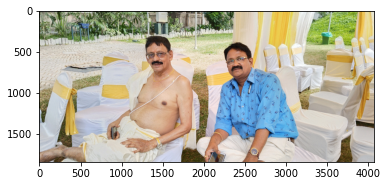

In [7]:
plt.imshow(img)

In [8]:
cv2.imread('IMG_20220912_104846.jpg')

array([[[112, 129, 142],
        [110, 127, 140],
        [104, 121, 134],
        ...,
        [119, 165, 146],
        [116, 164, 146],
        [115, 165, 147]],

       [[110, 127, 140],
        [109, 126, 139],
        [104, 121, 134],
        ...,
        [130, 176, 157],
        [126, 174, 156],
        [125, 175, 157]],

       [[109, 126, 139],
        [108, 125, 138],
        [104, 121, 134],
        ...,
        [152, 198, 179],
        [148, 196, 178],
        [146, 196, 178]],

       ...,

       [[ 66,  75,  89],
        [ 64,  73,  87],
        [ 67,  78,  92],
        ...,
        [193, 228, 242],
        [189, 223, 239],
        [188, 222, 238]],

       [[ 78,  87, 100],
        [ 77,  86,  99],
        [ 79,  88, 102],
        ...,
        [191, 227, 243],
        [187, 223, 239],
        [187, 223, 239]],

       [[ 78,  87, 100],
        [ 79,  88, 101],
        [ 80,  89, 103],
        ...,
        [190, 226, 242],
        [187, 223, 239],
        [187, 223, 239]]

In [4]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1A4A-6571

 Directory of C:\Users\K. RAVITEJA\Downloads

09-11-2022  08:02    <DIR>          .
09-11-2022  08:00    <DIR>          .ipynb_checkpoints
15-10-2022  14:30             2,757 04-using-the-node-modules-system.zip
09-05-2022  16:08           313,844 1.jpg
16-08-2022  15:46           273,247 10.1109ICSCCC.2018.8703316.pdf
13-06-2022  17:51           200,267 134_3_1834546_1655014334_AWS Course Completion Certificate.pdf
25-03-2022  21:59            82,485 1646655437802.jpg
26-09-2022  15:01             1,668 194.CircularLLC++.txt
07-04-2022  21:11         2,941,462 19761A0528.pdf
04-11-2022  19:02           635,003 19761A0548_aws.pdf
04-11-2022  09:11         1,605,230 1st Connect Session (Python AI ).pptx
15-05-2022  23:41             1,109 2022_0502-CON (1).ics
15-05-2022  23:40             1,109 2022_0502-CON.ics
21-06-2022  08:45               210 2022_06_21_08_45_02_exportSecurityGroupsToCsv.csv
21-04-2022  22:04           3

In [4]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)



In [6]:
cd ComputerVision2

[WinError 2] The system cannot find the file specified: 'ComputerVision2'
C:\Users\K. RAVITEJA\Downloads


In [8]:
train_dataset = train.flow_from_directory('ComputerVision2/training',
                                          target_size=(400,400),
                                          batch_size = 1,
                                          class_mode='binary')


Found 28 images belonging to 2 classes.


In [9]:
validation_dataset = validation.flow_from_directory('ComputerVision2/validation',
                                                    target_size = (400,400),
                                                    batch_size = 1,
                                                    class_mode = 'binary')

Found 28 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'A': 0, 'R': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [13]:
def policy_network():
  model = Sequential()

  model.add(Conv2D(16,(3,3),activation='relu',input_shape=(400,400,3)))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Flatten())

  model.add(Dense(512,activation='relu'))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model




In [14]:
model = policy_network()
model.fit(train_dataset,
          epochs = 15,
          validation_data = validation_dataset,
          shuffle=True)


Epoch 1/15
28/28 [==============================] - 12s 403ms/step - loss: 7.8329 - accuracy: 0.6071 - val_loss: 0.6979 - val_accuracy: 0.5714
Epoch 2/15
28/28 [==============================] - 11s 390ms/step - loss: 0.7478 - accuracy: 0.5714 - val_loss: 0.6449 - val_accuracy: 0.5714
Epoch 3/15
28/28 [==============================] - 11s 394ms/step - loss: 0.4867 - accuracy: 0.7500 - val_loss: 9.6560 - val_accuracy: 0.5714
Epoch 4/15
28/28 [==============================] - 11s 396ms/step - loss: 2.7111 - accuracy: 0.6429 - val_loss: 0.5994 - val_accuracy: 1.0000
Epoch 5/15
28/28 [==============================] - 12s 418ms/step - loss: 0.7736 - accuracy: 0.6786 - val_loss: 0.4682 - val_accuracy: 0.9643
Epoch 6/15
28/28 [==============================] - 11s 399ms/step - loss: 0.2876 - accuracy: 1.0000 - val_loss: 0.0754 - val_accuracy: 0.9643
Epoch 7/15
28/28 [==============================] - 11s 403ms/step - loss: 0.2979 - accuracy: 0.8929 - val_loss: 0.2715 - val_accuracy: 0.8571

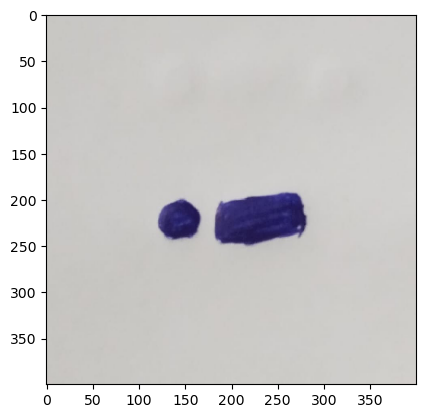

1/1 [==============================] - 0s 196ms/step
Prediction : A


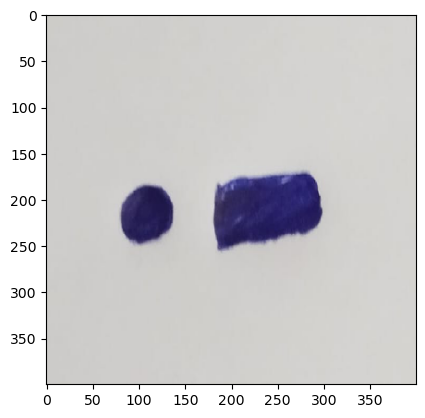

1/1 [==============================] - 0s 43ms/step
Prediction : A


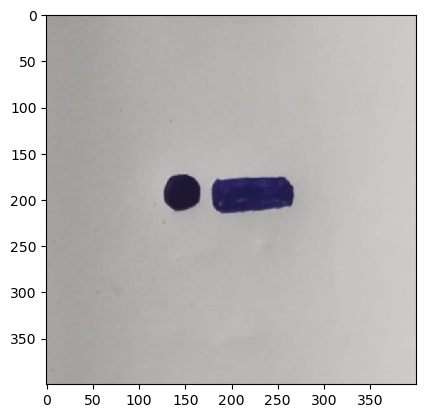

1/1 [==============================] - 0s 62ms/step
Prediction : A


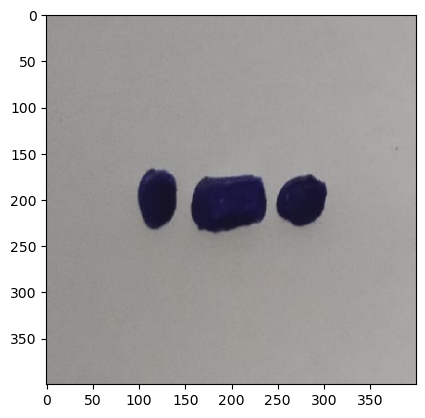

1/1 [==============================] - 0s 59ms/step
Prediction : R


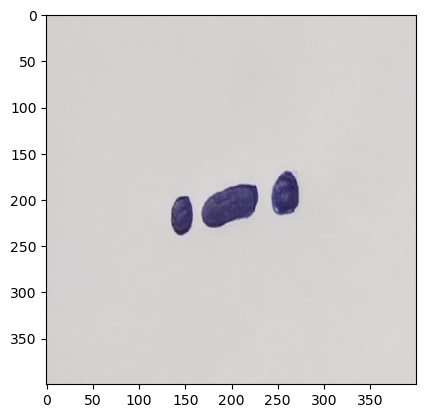

1/1 [==============================] - 0s 57ms/step
Prediction : R


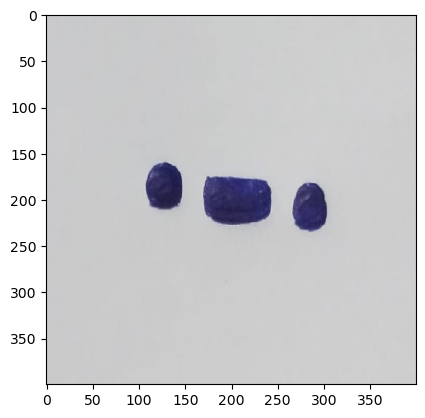

1/1 [==============================] - 0s 49ms/step
Prediction : R


In [15]:
dir_path = 'ComputerVision2/testing/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' + i,target_size=(400,400))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])

  pred = model.predict(images)

  if(pred == 0):
    print("Prediction : A")
  else:
    print("Prediction : R")

  